# چالش پیش بینی ترتیب نمایش تبلیغات شرکت تپسل 
## کاری از گروه هوش مصنوعی پانداز
### عباس امیدی-میلاد سلطانی-امیرحسین حیدریان
### Contact Us :
#### abbasomidi77@gmail.com 
#### soltany.m.99@gmail.com
#### amirhossein4633@gmail.com

ابتدا کتابخانه های مورد نیاز را ایمپورت می کنیم

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

سپس اقدام به اکسترکت و ذخیره سازی دادگان چالش در دیتافریم های مرتبط میکنیم

برای این کار با توجه به این که از گوگل کولب یرای کدینگ استفاده کردیم، گوگل درایو خود را با کولب همگام سازی میکنیم

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


با استفاده از کتابخانه ی مربوطه
اقدام به اکسترکت کردن فایل زیپ داده های مسئله می کنیم که قبلا در درایو سیو شده است و هر کدام را در متغیر مربوطه ذخیره می کنیم

In [0]:
from zipfile import ZipFile 
zipfile = '/gdrive/My Drive/datadays2020_contest_public_dataset.zip'
with ZipFile(zipfile, 'r') as zipfile: 
    zipfile.extractall()

In [0]:
cd datadays2020_contest_public_dataset

/content/datadays2020_contest_public_dataset


In [0]:
csvs = os.listdir()

In [0]:
for l in list(enumerate(csvs)):
  print(l)

(0, 'click_train.csv')
(1, 'ad_title.csv')
(2, 'event.csv')
(3, 'ad_image.csv')
(4, 'page_topic.csv')
(5, 'ad.csv')
(6, 'user_page_view.csv')
(7, 'page.csv')
(8, 'click_test.csv')


حالا که داده های مسئله را از درایو گوگل خود به کولب منتقل کردیم، اقدام به خواندن آنها در دیتافریم های پانداز میکنیم

In [0]:
user_page_view=pd.read_csv('user_page_view.csv')
click_train=pd.read_csv('click_train.csv')
ad_image=pd.read_csv('ad_image.csv')
ad=pd.read_csv('ad.csv')
page=pd.read_csv('page.csv')
ad_title=pd.read_csv('ad_title.csv')
event=pd.read_csv('event.csv')
page_topic=pd.read_csv('page_topic.csv')
click_test=pd.read_csv('click_test.csv')

اما قبل از هر کاری قصد داریم دو فیچر 

ctr و likelihood

که از پارامترهای های محبوب و مشهور حوزه ی 

recommender system

هستند را بر اساس مشخصات هر تبلیغ روی مجموعه ی 

adId

پیاده کنیم

برای این منظور فیچری تحت عنوان 

wordIdcount

تعریف میکنیم که بیانگر تعداد کلمات موجود در هر تبلیغ است

In [0]:
adIdunq = ad_title['adId'].unique()
missing_wordIds = np.append(np.setdiff1d(click_test['adId'].unique(),adIdunq),np.setdiff1d(click_train['adId'].unique(),adIdunq))
missing_wordIds = pd.DataFrame(data = {
    'adId':missing_wordIds,
    'wordId':0
})
ad_title = ad_title.append(missing_wordIds,ignore_index=True)
ad_title = ad_title.groupby('adId').agg({'wordId':'count'}).reset_index()
del adIdunq,missing_wordIds
ad_title.rename(columns = {'wordId':'wordIdcount'},inplace = True)

حالا مشخصات تصاویر تبلیغات که شامل یک بردار 512 عددیست هم به این دیتاست اضافه میکنیم

در این مرحله تنها مشخصات بصری مرتبط با هر تصویر را به هر تبلیغ اضافه میکنیم چون خود این مشخصات شامل فیچرهایی هستند که با استفاده از الگوریتم کانولوشن استخراج شده اند


قابل ذکر است که این دیتاست شامل ستون های کانولوشنی تصاویر است،یعنی به عبارت دیگر با اعمال شبکه کانولوشنی روی تصویر،فیچر ها و ویژگی های مهم بصری تصاویر در غالب رشته های نام پای ذخیره شده است

برای استخراج ستون ها، ابتدا کروشه ها اول و آخر رشته را جدا کرده ایم، سپس آنها را بر اساس هر تبلیغ درون یک دیتافریم ذخیره کرده ایم 

In [0]:
ad_complete = ad.merge(ad_title)

In [0]:
ad_image_copy = ad_image.copy()
n = 512
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[1:-1])
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x.split(','))
ad_image_copy['imageFeatures']=ad_image_copy['imageFeatures'].apply(lambda x:x[0:n])
df=pd.DataFrame(index=range(0,3256))
for i in range(0,n):
  df[i]=ad_image_copy['imageFeatures'].apply(lambda x:float(x[i]))
#df = df.astype('float16')
df['adId'] =ad_image_copy['adId']
df = df.add_prefix('img').rename(columns = {'imgadId':'adId'})
if512 = ''
kind = ''

In [0]:
ad_complete = ad_complete.merge(df,on = 'adId')
if512 = '512'

اقدام به تبدیل ستون های کتگوریکال به ستون های نومریکال میکنیم

کتگوریکال یعنی ستون مربوطه حاوی مقادیری است که صرفا به عنوان نام یا آیدی مورد استفاده قرار گرفته اند و اعداد مربوطه متریک خاصی را شامل نمیشود و بیشتر بودن عدد برای یک تبلیغ صرفا نشانه ی تفاوت نام است و قابل مقایسه نیستند

با توجه به این که مدل های هوش مصنوعی درکی از مقادیر کتگوریکال ندارند، با استفاده از تابع گت دامیز هر کدام از این مقادیر را یک ستون مجزا در نظر میگیریم که در صورت ارتباط آنها با تبلیغ، مقدار یک و در غیر این صورت مقدار صفر را دارا می باشند



In [0]:
train_adId_unq = click_train['adId'].unique()
test_adId_unq = click_test['adId'].unique()
unq_adId = np.unique(np.append(train_adId_unq,test_adId_unq))
unq_adId = pd.DataFrame(data = {'adId':unq_adId})

unq_adId = unq_adId.merge(ad_complete)

dummy_cmp = pd.get_dummies(unq_adId['campaignId'],prefix = 'CpgId',drop_first=True)
dummy_advertiser = pd.get_dummies(unq_adId['advertiserId'],prefix = 'adr',drop_first=True)
unq_adId = pd.concat([unq_adId.drop(['campaignId','advertiserId'],axis = 1),dummy_cmp,dummy_advertiser],axis = 1)

### CTR
پارامتر کلیک ریت


CTR : Click Through Rate

درصدی از بازدید کنندگان که روی یک تبلیغ خاص کلیک می کنند ، ولی ما این فیچر را به این صورت تغییر دادیم که روی هر تبلیغ با چه احتمالی کلیک می شود ، به عبارتی تقسیم تعداد کلیک شدن روی یک تبلیغ به تعداد دفعات نمایش آن می باشد

لکن برخی داده ها تعداد دفعات کمی نشان داده شده بودند مثلا 1 یا 2 بار ، برای همین این داده ها را در نظر نگرفتیم و در ادامه سعی شد که با استفاده از سایر فیچر ها، این پارامتر را برای داده هایی که دفعات کمی نشان داده شده بودند پیدا کنیم ، 
برای این کار از رگرسیون خطی استفاده کردیم

فیچر های مورد استفاده در این پردازش علاوه بر پارامتر های نومریکال از قبل به دست آمده ، بردار 512 تایی فیچر های ایمیج بود.
(از شبکه نیز استفاده شد که نتیجه ی خوبی نداد)


### outlier
در ایجاد فیچر ستون کلیک ریت ، ما یک ترشولد 4 تعریف میکنیم و تبلیغاتی که کمتر از 4 بار نمایش داده شده اند را به عنوان داده های پرت در نظر می گیریم

عدد 4 بر اساس تست ها ی تجربی انتخاب شده است و میتوان با انتخاب ترشولد های مختلف،نتایج متفاوتی را به دست آورد

In [0]:
kind +='ctr'
click_percentage = click_train.groupby('adId').agg({'clicked':'mean'}).reset_index()
click_percentage.rename(columns = {'clicked':'clicked mean'},inplace = True)
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)
th = 4
click_count = click_count.merge(click_percentage)
#outlier for ctr
train_no_data = click_count[click_count['clicked count']<th]
train_yes_data = click_count[click_count['clicked count']>=th]

train_eval_yes_data = click_count

X = train_yes_data.merge(unq_adId,on = 'adId')
X_e = train_eval_yes_data.merge(unq_adId,on = 'adId')

X_test = click_test.groupby('adId').agg('count').reset_index()
X_test.rename(columns = {'displayId':'clicked count'},inplace = True)
X_test = X_test.merge(unq_adId)

y = X['clicked mean']
X = X.drop('clicked mean',axis = 1)
X_e = X_e.drop('clicked mean',axis = 1)
X_eval = X_e.append(X_test).groupby('adId').first().reset_index().copy()

حالا با الگوریتم رگرسیون خطی اقدام به پیش بینی کلیک ریت برای اد آیدی های مختلف میکنیم

### linear regression 1

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
try : del lr
except : pass
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

lr = LinearRegression()
lr.fit(X,y)
pr = lr.predict(X)

   در نمودار زیر فاصله ی مقادیر پیش بینی شده با مقادیر اصلی برای دادگان موجود را مشاهده میکنیم که مقدار خطای پیش بینی ما را نمایش می دهد

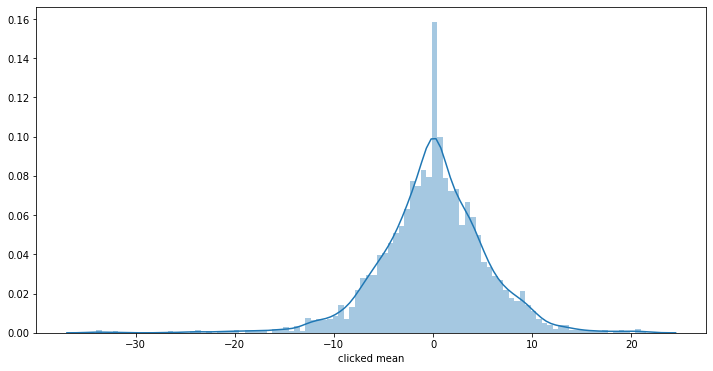

In [0]:
plt.figure(figsize = (12,6))
sns.distplot(100*(pr-y),bins = 100)

خطاهای مشهور  
mae 
و 
mse  
را نیز برای مقادیر پیش بینی شده مشاهده می کنیم

In [0]:
mae(pr,y)

0.03902261327912647

In [0]:
mse(pr,y)

0.0028985818291508334

In [0]:
pr_all = lr.predict(X_eval)

In [0]:
X_eval['clicked mean'] = pr_all
X_eval = X_eval[['adId','clicked mean']]

In [0]:
X_eval.rename({'clicked mean':'ctr'},axis=1,inplace=True)
ctr=X_eval.copy()

اما اولین فیچر ما برای تبلیغات تحت عنوان سی تی آر به دست آمد

In [0]:
ctr

,adId,ctr
0,6,0.353073
1,7,0.167374
2,8,0.202873
3,11,0.103456
4,13,0.094525
...,...,...
3251,7862,0.187171
3252,7863,0.123478
3253,7865,0.193661
3254,7866,0.350218


### likelihood

اما اقدام به پیش بینی بر اساس الگوریتم لایکلی هود نیز میکنیم

الگوریتم لایکلی هود نیز مانند سی تی آر،روشی برای به دست آوردن احتمال کلیک شدن روی هر تبلیغ است

تفاوت این الگوریتم با الگوریتم سی تی آر، این است که ما به احتمالات وزن می دهیم،یعنی به جای تقسیم صرف تعداد کلیک شدن به تعداد نمایش، ضریبی از میانگین کل کلیک شدن رو نیز به آن میدهیم

عدد 12 برای وزن احتمال به صورت تجربی تعیین شده و با تغییر آن می توان به نتایج متفاوتی دست یافت

In [0]:
kind += 'likelihood'
train=pd.read_csv('click_train.csv',usecols=['adId', 'clicked'])
ad_train_likelihood = train.groupby('adId')['clicked'].agg(['count', 'sum', 'mean']).reset_index()
M = train.clicked.mean()
del train
click_count      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count.rename(columns = {'clicked':'clicked count'},inplace = True)

click_count_test      = click_train.groupby('adId').agg({'clicked':'count'}).reset_index()
click_count_test.rename(columns = {'clicked':'clicked count'},inplace = True)

ad_train_likelihood['clicked mean'] = (ad_train_likelihood['sum'] + 12*M) / (12 + ad_train_likelihood['count'])#Actually likelihood
ad_train_likelihood.drop(['sum','mean'],axis = 1,inplace = True)
train_yes_data = ad_train_likelihood
X = train_yes_data.merge(unq_adId,on = 'adId')
X.rename(columns = {'count':'clicked count'},inplace = True)

X_test = click_test.groupby('adId').agg('count').reset_index()
X_test.rename(columns = {'displayId':'clicked count'},inplace = True)
X_test = X_test.merge(unq_adId)

y = X['clicked mean']
X = X.drop('clicked mean',axis = 1)

X_eval = X.append(X_test).groupby('adId').first().reset_index().copy()
th = 0

حالا با الگوریتم رگرسیون خطی اقدام به پیش بینی لایکلی هود برای اد آیدی های مختلف میکنیم

### linear regression 2

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
try : del lr
except : pass
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

lr = LinearRegression()
lr.fit(X,y)
pr = lr.predict(X)

   در نمودار زیر فاصله ی مقادیر پیش بینی شده با مقادیر اصلی برای دادگان موجود را مشاهده میکنیم که مقدار خطای پیش بینی ما را نمایش می دهد

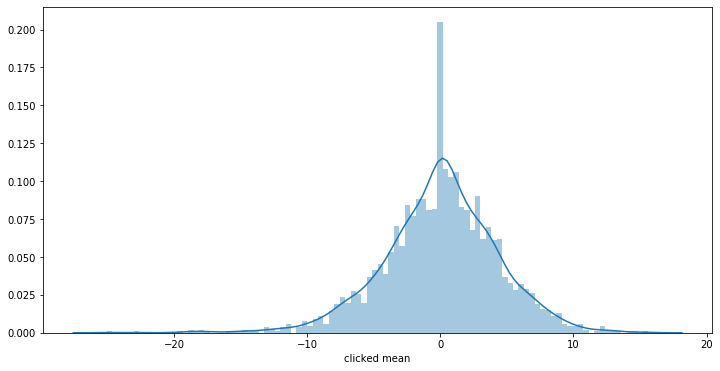

In [0]:
plt.figure(figsize = (12,6))
sns.distplot(100*(pr-y),bins = 100)

خطاهای مشهور  
mae 
و 
mse  
را نیز برای مقادیر پیش بینی شده مشاهده می کنیم

In [0]:
mae(pr,y)

0.032349383066180154

In [0]:
mse(pr,y)

0.0018712998710947997

In [0]:
pr_all = lr.predict(X_eval)

In [0]:
X_eval['clicked mean'] = pr_all
X_eval = X_eval[['adId','clicked mean']]

اما دومین فیچر ما برای تبلیغات هم تحت عنوان لایکلی هود به دست آمد

In [0]:
X_eval.rename({'clicked mean':'likelihood'},axis=1,inplace=True)
likelihood=X_eval.copy()

In [0]:
likelihood

,adId,likelihood
0,6,0.346149
1,7,0.179662
2,8,0.205031
3,11,0.130802
4,13,0.105461
...,...,...
3251,7862,0.205304
3252,7863,0.158492
3253,7865,0.193830
3254,7866,0.317007


حالا دو دیتاست 

ctr و likelihood

را به دست آوردیم و برای این که اختلالی در روند آتی به وجود نیاید،دیتاست های حاوی دادگان اصلی را دوباره میخوانیم تا تمام تغییرات اعمال شده از بین بروند

این دو فیچر را ساختیم و کارمان با آنها تمام است و بعدا از آنها استفاده میکنیم


In [0]:
click_train=pd.read_csv(csvs[0])
ad_title=pd.read_csv(csvs[1])
event=pd.read_csv(csvs[2])
ad_image=pd.read_csv(csvs[3])
page_topic=pd.read_csv(csvs[4])
ad=pd.read_csv(csvs[5])
user_page_view=pd.read_csv(csvs[6])
page=pd.read_csv(csvs[7])
click_test=pd.read_csv(csvs[8])


اما حالا اقدام به ساختن دیتاست اصلی مدل با تمام فیچرها میکنیم
ابتدا سه دیتاست 

event , page , ad

که اختلاف طول با دادگان ترین و تست ندارند را اضافه میکنیم

دیتاست ترین با حرف تی انگلیسی و دیتاست تست با حرف اف انگلیسی نمایش داده شده است و در هر مرحله با اضافه شدن فیچر جدید، دیتاست با فیچر های جدید مرج میشود و دیتاست قبلی حذف میشود تا به مشکل کمبود رم برنخوریم

In [0]:
f1=click_test.merge(event,how='inner')
f2=f1.merge(page,how='inner')
del f1
f3=f2.merge(ad,how='inner')
del f2
f3

,displayId,adId,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId
0,151650,7585,1579975891854,4095035,8107,10279,1,1,7,4600,1098,2292,7762
1,737507,7585,1579796825112,4273336,6093,376120,1,1,4,13,12,2292,7762
2,535646,7585,1579877408982,317,7991,226140,1,1,0,39,38,2292,7762
3,540368,7585,1579875729437,317,7991,230115,1,1,0,39,38,2292,7762
4,541141,7585,1579875604100,317,7991,230437,1,1,4,39,38,2292,7762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199043,1165347,7285,1579661376583,9714989,496,671795,1,1,8,35461,2347,268,3096
1199044,1168441,7285,1579660570589,9712149,496,673741,1,1,4,35461,2347,268,3096
1199045,1326880,7184,1579599671339,9557630,8257,778404,1,1,0,5,3,8405,6572
1199046,1316697,5382,1579602550035,27420,12940,773705,0,0,0,320,284,5681,4187


In [0]:
t1=click_train.merge(event,how='inner')
t2=t1.merge(page,how='inner')
t3=t2.merge(ad,how='inner')
del t2,t1
t3

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId
0,1210227,7182,0,1579598863403,420857,9519,782749,0,0,1,477,49,3402,7579
1,1248098,7182,0,1579595840497,619,6167,791563,0,2,2,18,17,3402,7579
2,1271266,7182,1,1579595490529,11611,12678,792543,0,0,1,69,66,3402,7579
3,1285917,7182,1,1579596863199,163,10142,788614,0,0,0,13,12,3402,7579
4,1336598,7182,1,1579597467698,163,10142,786811,0,0,1,13,12,3402,7579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4658083,4433,0,1578451785227,6253310,12487,1025974,1,1,0,15,14,1792,9424
3642240,4485064,5224,0,1578496280410,6404608,12676,2382857,0,0,1,5,3,1337,3043
3642241,4631262,5373,1,1578457919467,6239561,8257,258536,0,0,0,5,3,1337,3043
3642242,4631231,5373,0,1578457755488,6162861,8257,2253915,0,0,10,5,3,1337,3043


### page topic

اما نوبت به فیچر تاپیک میرسد
برای استفاده از این تاپیک ها،ما موضوعی که بیشترین ارتباط با صفحه را دارد،یعنی بیشترین کانفیدنس را دارد،انتخاب میکنیم

به این ترتیب که دیتاست را بر اساس ضرایب ارتباط موضوعات با تبلیغ مرتب میکنیم، با این کار در دیتاست،موضوعی که بیشترین ضریب ارتباط را دارد بالاتر قرار میگیرد،سپس برای هر تبلیغ اولین موضوع که مرتبط ترین موضوع است را نگه میداریم و مابقی را حذف میکنیم 

In [0]:
t4=t3.merge(page_topic,how='left')
f4=f3.merge(page_topic,how='left')

In [0]:
t4=t4.sort_values(['confidence'],ascending=False).drop_duplicates(subset =['displayId','adId'], keep = 'first') 
f4=f4.sort_values(['confidence'],ascending=False).drop_duplicates(subset =['displayId','adId'], keep = 'first') 

In [0]:
t4.drop('confidence',axis=1,inplace=True)
f4.drop('confidence',axis=1,inplace=True)
f4['topicId'].fillna(-100,inplace=True)
t4['topicId'].fillna(-100,inplace=True)
f4['topicId']=f4['topicId'].astype('int')
t4['topicId']=t4['topicId'].astype('int')

In [0]:
t4

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId
10138623,2794500,6121,0,1579077824614,630710,6048,558070,0,0,0,285,252,5207,10522,6
12240683,2794500,5232,0,1579077824614,630710,6048,558070,0,0,0,285,252,7185,1386,6
12793653,2794500,5917,0,1579077824614,630710,6048,558070,0,0,0,285,252,7185,1386,6
7724127,2794500,6356,1,1579077824614,630710,6048,558070,0,0,0,285,252,7773,5687,6
4273597,2794500,4179,0,1579077824614,630710,6048,558070,0,0,0,285,252,7672,7498,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138813,3308643,6096,0,1578902823111,38894,12609,1956643,0,0,0,58,57,5481,4187,-100
13138840,3552970,5951,0,1578824565736,6208224,633,1106602,1,1,4,2,2,1736,8029,-100
13138848,4417131,5225,0,1578530724696,6371121,3410,2539382,0,0,5,45,44,3700,4187,-100
13138873,4470428,2479,0,1578499844528,6444742,13429,2567668,1,1,0,7437,1288,2118,7901,-100


In [0]:
f4

,displayId,adId,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId
294722,583542,7002,1579862562780,1113737,1589,262668,0,0,10,127,121,532,5180,6
4203232,583542,6112,1579862562780,1113737,1589,262668,0,0,10,127,121,3604,1386,6
1588051,583542,7090,1579862562780,1113737,1589,262668,0,0,10,127,121,3341,290,6
1168241,583542,7035,1579862562780,1113737,1589,262668,0,0,10,127,121,532,5180,6
1274929,583542,7091,1579862562780,1113737,1589,262668,0,0,10,127,121,3341,290,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389866,1062553,6629,1579687787258,9823528,10589,602618,1,1,8,130,90,8835,6642,-100
4389879,1229447,6629,1579626073655,75719,10589,359504,1,1,0,707,90,8835,6642,-100
4389919,1326492,7168,1579599781695,9529690,7759,80263,1,1,0,0,0,8405,6572,-100
4389920,1328140,7168,1579599405160,8031318,12153,781258,1,1,0,15,14,8405,6572,-100


In [0]:
del t3,f3

### wordid

اما سراغ فیچر بعدی یعنی تعداد کلمات موجود درون هر تبلیغ میرویم
برای یک سری تبلیغ ها ، وردآیدی وجود ندارد که سعی می کنیم آنها را پیدا کنیم و آن مقدار را با صفر جایگرین کینم

برای ساختن این فیچر،از وردایدی اگریگیشن کانت میگیریم و برای تبلیغاتی که وردآیدی ندارند، شناسه ی تبلیغ را به کمک تابع "ست دیف" پیدا میکنیم و جای آن صفر قرار میدهیم

In [0]:
adIdunq = ad_title['adId'].unique()
missing_wordIds = np.append(np.setdiff1d(click_test['adId'].unique(),adIdunq),np.setdiff1d(click_train['adId'].unique(),adIdunq))
missing_wordIds = pd.DataFrame(data = {
    'adId':missing_wordIds,
    'wordId':0
})
ad_title = ad_title.append(missing_wordIds,ignore_index=True)
ad_title = ad_title.groupby('adId').agg({'wordId':'count'}).reset_index()
del adIdunq,missing_wordIds

In [0]:
f5=f4.merge(ad_title,how='inner')
t5=t4.merge(ad_title,how='inner')

In [0]:
t5

,displayId,adId,clicked,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId,wordId
0,2794500,6121,0,1579077824614,630710,6048,558070,0,0,0,285,252,5207,10522,6,5
1,2008745,6121,0,1579373196091,23196,1589,1206842,0,0,1,127,121,5207,10522,6,5
2,2838158,6121,0,1579066662166,104069,1103,1695493,0,0,0,453,375,5207,10522,6,5
3,3166845,6121,0,1578943757168,292331,1103,1877169,0,0,1,453,375,5207,10522,6,5
4,2663600,6121,0,1579132662629,34851,1103,1593746,0,0,0,453,375,5207,10522,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4465525,336,0,1578500985546,6453518,12299,670476,1,1,4,3,3,7755,9965,-100,6
3642240,4466809,336,0,1578500725427,6453518,12299,58409,1,1,4,3,3,7755,9965,-100,6
3642241,4417268,336,0,1578530591547,6464609,7468,2347561,1,1,4,3,3,7755,9965,-100,6
3642242,4458615,336,0,1578503110234,6433822,12299,1596230,1,1,0,3,3,7755,9965,-100,6


In [0]:
f5

,displayId,adId,timestamp,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId,wordId
0,583542,7002,1579862562780,1113737,1589,262668,0,0,10,127,121,532,5180,6,4
1,595982,7002,1579858544915,716076,1589,271994,0,0,0,127,121,532,5180,6,4
2,541277,7002,1579875543975,104069,1103,224454,0,0,10,453,375,532,5180,6,4
3,607236,7002,1579855104786,292331,1644,280447,0,0,0,453,375,532,5180,6,4
4,570233,7002,1579866780989,312054,1589,252511,0,0,0,127,121,532,5180,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199043,250263,7863,1579978904989,334,5903,5067,1,3,2,23,22,8343,8414,-100,5
1199044,1306331,6702,1579605801709,2285483,3148,766152,1,1,4,5,3,6166,6572,-100,5
1199045,1306331,6701,1579605801709,2285483,3148,766152,1,1,4,5,3,6166,6572,-100,7
1199046,1307579,6701,1579605409946,9580109,12818,98253,1,1,4,15,14,6166,6572,-100,7


In [0]:
del t4,f4

### timestamp
اما به سراغ استخراج تعدادی فیچر بر اساس زمان مشاهده تبلیغ میرویم

 تایم استمپ یک نوع داده می باشد که اطلاعات زمانی یک دیسپلی آیدی را نمایش می دهد که بر حسب به میلی ثانیه می باشد  و هر داده نشان دهنده ی زمان طی شده به میلی ثانیه از 
سال 1970 می باشد

برای تبدیل به ثانیه ، تابعی نوشتیم که داده ها را بر 1000 تقسیم می کند و با استفاده از کتابخانه ی

Datetime

آن را به فرمت رایج نمایش تاریخ در می آوریم و این تابع را روی تمام داده ها اپلای میکنیم

فیچر های استخراج شده شامل روز هفته،روز ماه،ساعت نمایش تبلیغ و ماه میباشد

In [0]:
from datetime import datetime
def timestamp2date(timestamp):
  return datetime.fromtimestamp(timestamp/1000)

In [0]:
t5['timestamp']=t5['timestamp'].apply(timestamp2date)

In [0]:
t5['Month'] = t5['timestamp'].dt.month
t5['Day of the month'] = t5['timestamp'].dt.day
t5["Day of the week"] = t5['timestamp'].dt.dayofweek
t5['Hour'] = t5['timestamp'].dt.hour
t5 = t5.drop(['timestamp'], axis=1)

In [0]:
f5['timestamp']=f5['timestamp'].apply(timestamp2date)

In [0]:
f5['Month'] = f5['timestamp'].dt.month
f5['Day of the month'] = f5['timestamp'].dt.day
f5["Day of the week"] = f5['timestamp'].dt.dayofweek
f5['Hour'] = f5['timestamp'].dt.hour
f5 = f5.drop(['timestamp'], axis=1)

In [0]:
t5

,displayId,adId,clicked,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId,wordId,Month,Day of the month,Day of the week,Hour
0,2794500,6121,0,630710,6048,558070,0,0,0,285,252,5207,10522,6,5,1,15,2,8
1,2008745,6121,0,23196,1589,1206842,0,0,1,127,121,5207,10522,6,5,1,18,5,18
2,2838158,6121,0,104069,1103,1695493,0,0,0,453,375,5207,10522,6,5,1,15,2,5
3,3166845,6121,0,292331,1103,1877169,0,0,1,453,375,5207,10522,6,5,1,13,0,19
4,2663600,6121,0,34851,1103,1593746,0,0,0,453,375,5207,10522,6,5,1,15,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,4465525,336,0,6453518,12299,670476,1,1,4,3,3,7755,9965,-100,6,1,8,2,16
3642240,4466809,336,0,6453518,12299,58409,1,1,4,3,3,7755,9965,-100,6,1,8,2,16
3642241,4417268,336,0,6464609,7468,2347561,1,1,4,3,3,7755,9965,-100,6,1,9,3,0
3642242,4458615,336,0,6433822,12299,1596230,1,1,0,3,3,7755,9965,-100,6,1,8,2,17


In [0]:
f5

,displayId,adId,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId,wordId,Month,Day of the month,Day of the week,Hour
0,583542,7002,1113737,1589,262668,0,0,10,127,121,532,5180,6,4,1,24,4,10
1,595982,7002,716076,1589,271994,0,0,0,127,121,532,5180,6,4,1,24,4,9
2,541277,7002,104069,1103,224454,0,0,10,453,375,532,5180,6,4,1,24,4,14
3,607236,7002,292331,1644,280447,0,0,0,453,375,532,5180,6,4,1,24,4,8
4,570233,7002,312054,1589,252511,0,0,0,127,121,532,5180,6,4,1,24,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199043,250263,7863,334,5903,5067,1,3,2,23,22,8343,8414,-100,5,1,25,5,19
1199044,1306331,6702,2285483,3148,766152,1,1,4,5,3,6166,6572,-100,5,1,21,1,11
1199045,1306331,6701,2285483,3148,766152,1,1,4,5,3,6166,6572,-100,7,1,21,1,11
1199046,1307579,6701,9580109,12818,98253,1,1,4,15,14,6166,6572,-100,7,1,21,1,11


اما برای شهود بیشتر نسبت به داده ها، نمودارهایی رسم میکنیم که تعداد کلیک شدن روی تبلیغ های نمایش داده شده را بر حسب فیچر های متفاوت نمایش میدهد

به خوبی مشاهده میشود که ساعت یا روز نمایش تبلیغ،اثر زیادی روی کلیک شدن رو تبلیغ ها داشته است که میتواند به علت میزان بازدید تبلیغات در آن بازه های زمانی باشد

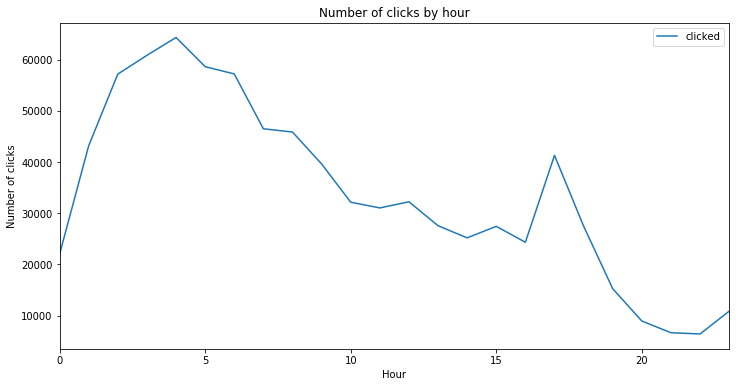

In [0]:
t5.groupby('Hour').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

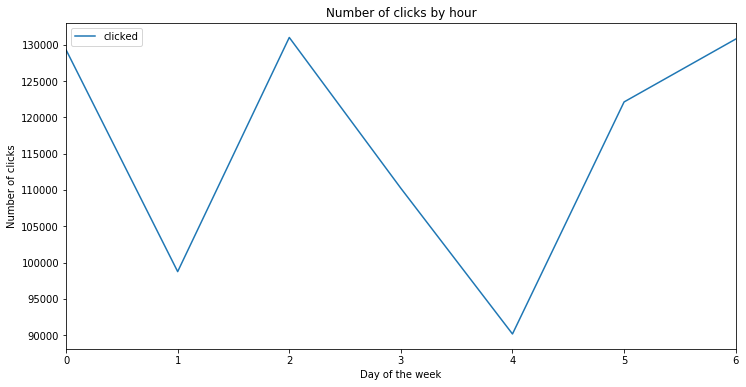

In [0]:
t5.groupby('Day of the week').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

### image features

اما در مرحله ی بعد اقدام به اضافه کردن تعداد 75 ستون از ستون های فیچر مرتبط با هر تبلیغ به مجموعه ی دادگانمان میکنیم تا  مدل از آنها هم به عنوان فیچر استفاده کند

قابل ذکر است که این دیتاست شامل ستون های کانولوشنی تصاویر است،یعنی به عبارت دیگر با اعمال شبکه کانولوشنی روی تصویر،فیچر ها و ویژگی های مهم بصری تصاویر در غالب رشته های نام پای ذخیره شده است

نکته : عدد 75 پس از اتمام مراحل بعدی و مشخص شدن تمامی فیچر ها تعیین شده است

ورودی مدل ما دقیقا 100 ستون دارد که 25 ستون آن شامل فیچر های غیر کانولوشنی و 75 ستون آن شامل فیچرهای کانولوشنی است

یعنی برای ورودی های کانولوشنی نسبت به ستون های غیر کانولوشنی نسبت 3 به 1 انتخاب شده است که دلیل این انتخاب ساختار استخراج فیچر توسط شبکه کانولوشنی و اثر اهمیت این فیچر ها روی یادگیری مدل های هوش مصنوعی میباشد

این نسبت نیز بر حسب تجربه قابل تغییر است و با تغییر آن نتایج متفاوتی حاصل می شود

برای استخراج ستون ها، ابتدا کروشه ها اول و آخر رشته را جدا کرده ایم، سپس آنها را بر اساس هر تبلیغ درون یک دیتافریم ذخیره کرده ایم و به نسبت 3 به 1 آنها را جدا کرده ایم

In [0]:
ad_image['imageFeatures']=ad_image['imageFeatures'].apply(lambda x:x[1:-1])
ad_image['imageFeatures']=ad_image['imageFeatures'].apply(lambda x:x.split(','))
ad_image['imageFeatures']=ad_image['imageFeatures'].apply(lambda x:x[0:75])
df=pd.DataFrame(columns=range(0,75),index=range(0,3256))
for i in range(0,75):
  df[i]=ad_image['imageFeatures'].apply(lambda x:float(x[i]))
df=pd.concat([ad_image,df],axis=1)
df.drop('imageFeatures',axis=1,inplace=True)
df

,adId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,7867,0.052459,0.000000,0.042624,0.333583,0.383563,0.001634,0.344869,0.525469,0.053760,0.079034,0.500915,0.677032,0.000000,0.047452,0.113147,0.007646,0.000000,0.150139,0.032419,0.004933,0.000000,0.000000,0.573060,0.019596,0.000000,0.092233,0.025148,0.072606,0.000000,0.537699,0.000000,0.154060,0.955965,0.105462,0.003840,0.000000,0.098950,0.000000,0.179287,0.000000,0.536611,0.237531,0.046891,0.805876,0.000000,0.000000,0.013033,1.113734,0.442652,0.097198,0.693817,0.283778,0.175930,0.000000,0.012602,0.347197,0.000000,0.076646,0.000000,0.002630,0.006321,0.743509,0.000000,0.000000,0.136089,0.000000,0.242281,0.738995,0.000000,0.148560,1.382377,0.214168,0.027074,0.000000,0.000000
1,7866,0.003216,0.144424,0.000149,0.246036,0.133644,0.000000,0.915359,0.494597,0.000000,0.244905,0.000000,0.285869,0.010935,0.193851,0.123908,0.000000,0.001576,0.479430,0.099850,0.397035,0.000000,0.083739,0.365803,0.000000,0.000000,0.368738,0.038240,0.530159,0.035848,0.759484,0.000000,0.387569,0.231120,0.000000,0.000000,0.048897,0.073044,0.000000,0.003703,0.006700,0.368304,0.358870,0.109668,0.420363,0.000000,0.267692,0.000000,0.880436,0.283177,0.006300,0.012654,0.408644,0.047332,0.000000,0.063860,0.592164,0.000000,0.000000,0.000000,0.007412,0.263967,0.777541,0.000000,0.064273,0.000000,0.037116,0.000000,0.200322,0.014681,0.180190,0.646452,0.320071,0.069347,0.000000,0.019961
2,7865,0.027210,0.000000,0.513353,0.295720,0.378193,0.000000,0.826202,0.000000,0.000000,0.478022,0.000000,0.198038,0.000000,0.048585,0.158298,0.000000,0.000000,0.010905,0.558909,0.000046,0.282498,0.003930,0.228165,0.000000,0.000000,0.006795,0.000000,0.025838,0.049386,0.005479,0.020980,0.034951,0.007829,0.000000,0.160475,0.326603,0.744559,0.000000,0.102203,0.013645,0.793269,0.086640,0.049924,0.119428,0.001079,0.018803,0.000000,1.391739,0.036747,0.104049,0.000000,0.416269,0.000000,0.000000,0.011033,0.088203,0.122163,0.053244,0.000000,0.028721,0.000000,0.000000,0.000000,0.000000,0.120012,0.000000,0.000000,0.392362,0.000000,0.000000,0.059540,0.505429,0.046780,0.000000,0.118087
3,7863,0.001398,0.000000,0.000000,0.045557,0.264038,0.028482,0.504099,0.000000,0.367462,0.260327,0.952236,0.010145,0.000000,0.018427,0.035838,0.077275,0.051724,0.000000,0.000000,0.022899,0.055368,0.000000,0.672315,0.247884,0.000000,0.213115,0.012865,0.110544,0.041787,0.016642,0.000000,0.000000,0.203766,0.000000,0.589644,0.006881,0.026439,0.106596,0.000000,0.000000,0.579163,0.060182,0.189460,0.248107,0.011869,0.000000,0.038769,0.065701,1.317021,0.196837,0.000000,0.336468,0.000000,0.549798,0.004204,0.434163,0.035940,0.000000,0.000000,0.022406,0.042722,0.473303,0.000000,0.000000,0.018779,0.171609,0.000000,0.122534,0.000000,0.355458,0.006629,0.846061,0.106042,0.019774,0.016399
4,7862,0.024268,0.026082,0.226017,0.023072,0.490081,0.004264,0.871454,0.002935,0.361995,1.318446,0.184377,0.000000,0.000000,0.251946,1.076047,0.099979,0.000000,0.000000,0.005898,0.042946,0.023711,0.003651,1.057478,0.000000,0.000000,0.030528,0.042976,0.024609,0.013708,0.302596,0.000000,0.000000,0.000000,0.000000,0.029792,0.000000,0.000000,0.000000,0.000000,0.058011,0.688045,0.292834,0.017247,0.082948,0.000000,0.000000,0.154396,0.094022,0.020444,0.100774,0.112174,0.428538,0.994281,0.016820,1.236279,0.108312,0.096391,0.000000,0.000000,0.000000,0.013367,0.000000,0.088612,0.000000,0.004200,0.000000,0.000000,0.000000,0.000000,0.000000,0.276904,0.281480,0.042475,0.020410,0.442442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,13,0.148167,0.043468,1.341706,1.226016,0.379946,0.173325

In [0]:
f5=f5.merge(df,how='inner')
t5=t5.merge(df,how='inner')

In [0]:
del df

### averages

اما در مرحله ی بعد،اقدام به به دست آوردن نرخ کلیک برای یعضی از ستون ها میکنیم تا به عنوان فیچر از آن استفاده کنیم

در این مرحله برای تعدادی از فیچر ها ، نرخ کلیک شدن را نیز به دست می آوریم و به عنوان فیچر مجزا مورد استفاده قرار میدهیم

یعنی مانند فیچر سی تی آر که برای هر اد آیدی نرخ کلیک شدن را به دست می آوردیم، اینجا نیز برای ویجت آیدی و وبسایت و ویژگی های مختلف دیگر نیز این نرخ کلیک را به دست می آوریم، اما به علت کلد استارت نبودن این ویژگی ها و وجود تشابه کافی بین داده های تست و ترین

دیگر نیازی به اعمال رگرسیون برای پیش بینی مقادیر خالی وجود ندارد و صرفا آن ها را با مقدار میانگین جایگزین میکنیم

به دست آوردن این نرخ کلیک مانند سی تی آر به این صورت است که داده ها را بر اساس ویژگی مورد نظر گروپ بای میکنیم و ستون کلیک آنها کانت میگیریم و برای مقادیر خالی که آنها را با تابع ست دیف به دست آوردیم نیز به جای پیش بینی،صرفا میانگین آنها را جایگزین میکنیم

این کار را تقریبا برای تمام فیچر های موجود میتوان انجام داد که انتخاب ستون های مورد استفاده بر اساس تست های تجربی حاصل شده است

In [0]:
#Finding Percentage for widgetId
diff = len(np.setdiff1d(f5['widgetId'],t5['widgetId']))
print('number of unique values for widgetId in t4_copy : ',t5['widgetId'].nunique())
print('number of unique values for widgetId in f4_copy : ',f5['widgetId'].nunique())
print('number of unique values for widgetId in t4_copy that do not exist in f4_copy : ',diff)
del diff
widgetId_avg = t5.groupby('widgetId').mean()['clicked']
widgetId_avg = pd.DataFrame(widgetId_avg).reset_index().rename({'clicked':'widgetId_avg'},axis = 1)
diff_widgetId = np.setdiff1d(f5['widgetId'],t5['widgetId'])
diff_widgetId = pd.DataFrame(data = {
    'widgetId' : diff_widgetId,
    'widgetId_avg' : widgetId_avg['widgetId_avg'].mean()
})
widgetId_avg=widgetId_avg.append(diff_widgetId).reset_index().drop('index',axis = 1)

f5 = f5.merge(widgetId_avg)
t5 = t5.merge(widgetId_avg)

del widgetId_avg,diff_widgetId

number of unique values for widgetId in t4_copy :  1159
number of unique values for widgetId in f4_copy :  955
number of unique values for widgetId in t4_copy that do not exist in f4_copy :  50


In [0]:
#Finding Percentage for website
diff = len(np.setdiff1d(f5['website'],t5['website']))
print('number of unique values for website in t5 : ',t5['website'].nunique())
print('number of unique values for website in f5 : ',f5['website'].nunique())
print('number of unique values for website in t5 that do not exist in f5 : ',diff)
del diff

website_avg = t5.groupby('website').mean()['clicked']
website_avg = pd.DataFrame(website_avg).reset_index().rename({'clicked':'website_avg'},axis = 1)
diff_website = np.setdiff1d(f5['website'],t5['website'])
diff_website = pd.DataFrame(data = {
    'website' : diff_website,
    'website_avg' : website_avg['website_avg'].mean()
})
website_avg=website_avg.append(diff_website).reset_index().drop('index',axis = 1)

f5 = f5.merge(website_avg)
t5 = t5.merge(website_avg)

del website_avg,diff_website

number of unique values for website in t5 :  2858
number of unique values for website in f5 :  623
number of unique values for website in t5 that do not exist in f5 :  35


In [0]:
#Finding Percentage for campaignId
diff = len(np.setdiff1d(f5['campaignId'],t5['campaignId']))
print('number of unique values for campaignId in t5 : ',t5['campaignId'].nunique())
print('number of unique values for campaignId in f5 : ',f5['campaignId'].nunique())
print('number of unique values for campaignId in t5 that do not exist in f5 : ',diff)
del diff

campaignId_avg = t5.groupby('campaignId').mean()['clicked']
campaignId_avg = pd.DataFrame(campaignId_avg).reset_index().rename({'clicked':'campaignId_avg'},axis = 1)
diff_campaignId = np.setdiff1d(f5['campaignId'],t5['campaignId'])
diff_campaignId = pd.DataFrame(data = {
    'campaignId' : diff_campaignId,
    'campaignId_avg' : campaignId_avg['campaignId_avg'].mean()
})
campaignId_avg=campaignId_avg.append(diff_campaignId).reset_index().drop('index',axis = 1)

f5 = f5.merge(campaignId_avg)
t5 = t5.merge(campaignId_avg)

del campaignId_avg,diff_campaignId

number of unique values for campaignId in t5 :  463
number of unique values for campaignId in f5 :  290
number of unique values for campaignId in t5 that do not exist in f5 :  65


In [0]:
#Finding Percentage for advertiserId
diff = len(np.setdiff1d(f5['advertiserId'],t5['advertiserId']))
print('number of unique values for advertiserId in t5 : ',t5['advertiserId'].nunique())
print('number of unique values for advertiserId in f5 : ',f5['advertiserId'].nunique())
print('number of unique values for advertiserId in t5 that do not exist in f5 : ',diff)
del diff

advertiserId_avg = t5.groupby('advertiserId').mean()['clicked']
advertiserId_avg = pd.DataFrame(advertiserId_avg).reset_index().rename({'clicked':'advertiserId_avg'},axis = 1)
diff_advertiserId	 = np.setdiff1d(f5['advertiserId'],t5['advertiserId'])
diff_advertiserId	 = pd.DataFrame(data = {
    'advertiserId' : diff_advertiserId,
    'advertiserId_avg' : advertiserId_avg['advertiserId_avg'].mean()
})
advertiserId_avg=advertiserId_avg.append(diff_advertiserId).reset_index().drop('index',axis = 1)

f5 = f5.merge(advertiserId_avg)
t5 = t5.merge(advertiserId_avg)

del advertiserId_avg,diff_advertiserId	

number of unique values for advertiserId in t5 :  196
number of unique values for advertiserId in f5 :  129
number of unique values for advertiserId in t5 that do not exist in f5 :  17


In [0]:
#Finding Percentage for topicId
diff = len(np.setdiff1d(f5['topicId'],t5['topicId']))
print('number of unique values for topicId in t5 : ',t5['topicId'].nunique())
print('number of unique values for topicId in f5 : ',f5['topicId'].nunique())
print('number of unique values for topicId in t5 that do not exist in f5 : ',diff)
del diff

topicId_avg = t5.groupby('topicId').mean()['clicked']
topicId_avg = pd.DataFrame(topicId_avg).reset_index().rename({'clicked':'topicId_avg'},axis = 1)
diff_topicId	 = np.setdiff1d(f5['topicId'],t5['topicId'])
diff_topicId	 = pd.DataFrame(data = {
    'topicId' : diff_topicId,
    'topicId_avg' : topicId_avg['topicId_avg'].mean()
})
topicId_avg=topicId_avg.append(diff_topicId).reset_index().drop('index',axis = 1)

f5 = f5.merge(topicId_avg)
t5 = t5.merge(topicId_avg)

del topicId_avg,diff_topicId	

number of unique values for topicId in t5 :  51
number of unique values for topicId in f5 :  51
number of unique values for topicId in t5 that do not exist in f5 :  0


خب

و اما حالا فیچر های سی تی آر و لایکیهود را به دیتاست های نهاییمان اضافه میکنیم

In [0]:
ctrm=ctr.merge(likelihood)

In [0]:
t5=t5.merge(ctrm)

In [0]:
f5=f5.merge(ctrm)

In [0]:
t5

,displayId,adId,clicked,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId,wordId,Month,Day of the month,Day of the week,Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,widgetId_avg,website_avg,campaignId_avg,advertiserId_avg,topicId_avg,ctr,likelihood
0,2794500,6121,0,630710,6048,558070,0,0,0,285,252,5207,10522,6,5,1,15,2,8,0.083100,0.125559,0.000000,0.058716,0.804212,0.465044,1.686451,0.025523,0.113996,0.266320,0.034999,0.415867,0.000000,0.023382,0.000000,0.272363,0.025756,0.008764,0.069135,0.041539,0.000000,...,0.075658,0.081643,0.011691,0.176636,1.437707,0.261554,0.000000,0.011931,0.593580,0.691117,0.507203,0.210920,0.251381,0.089404,0.085483,0.004101,0.000000,0.212071,0.045661,0.066766,0.0,0.000000,0.00000,0.318369,0.059062,0.023529,0.000000,0.150161,0.000204,0.142261,0.259974,0.000000,0.925770,0.151491,0.151491,0.207224,0.183466,0.221087,0.225338,0.230799
1,3180773,6121,0,320851,6048,1042619,0,0,0,285,252,5207,10522,6,5,1,13,0,17,0.083100,0.125559,0.000000,0.058716,0.804212,0.465044,1.686451,0.025523,0.113996,0.266320,0.034999,0.415867,0.000000,0.023382,0.000000,0.272363,0.025756,0.008764,0.069135,0.041539,0.000000,...,0.075658,0.081643,0.011691,0.176636,1.437707,0.261554,0.000000,0.011931,0.593580,0.691117,0.507203,0.210920,0.251381,0.089404,0.085483,0.004101,0.000000,0.212071,0.045661,0.066766,0.0,0.000000,0.00000,0.318369,0.059062,0.023529,0.000000,0.150161,0.000204,0.142261,0.259974,0.000000,0.925770,0.151491,0.151491,0.207224,0.183466,0.221087,0.225338,0.230799
2,2477013,6121,0,352296,6048,1363779,0,2,9,285,252,5207,10522,6,5,1,16,3,17,0.083100,0.125559,0.000000,0.058716,0.804212,0.465044,1.686451,0.025523,0.113996,0.266320,0.034999,0.415867,0.000000,0.023382,0.000000,0.272363,0.025756,0.008764,0.069135,0.041539,0.000000,...,0.075658,0.081643,0.011691,0.176636,1.437707,0.261554,0.000000,0.011931,0.593580,0.691117,0.507203,0.210920,0.251381,0.089404,0.085483,0.004101,0.000000,0.212071,0.045661,0.066766,0.0,0.000000,0.00000,0.318369,0.059062,0.023529,0.000000,0.150161,0.000204,0.142261,0.259974,0.000000,0.925770,0.151491,0.151491,0.207224,0.183466,0.221087,0.225338,0.230799
3,3126946,6121,1,7527729,6048,489167,0,0,0,285,252,5207,10522,6,5,1,14,1,2,0.083100,0.125559,0.000000,0.058716,0.804212,0.465044,1.686451,0.025523,0.113996,0.266320,0.034999,0.415867,0.000000,0.023382,0.000000,0.272363,0.025756,0.008764,0.069135,0.041539,0.000000,...,0.075658,0.081643,0.011691,0.176636,1.437707,0.261554,0.000000,0.011931,0.593580,0.691117,0.507203,0.210920,0.251381,0.089404,0.085483,0.004101,0.000000,0.212071,0.045661,0.066766,0.0,0.000000,0.00000,0.318369,0.059062,0.023529,0.000000,0.150161,0.000204,0.142261,0.259974,0.000000,0.925770,0.151491,0.151491,0.207224,0.183466,0.221087,0.225338,0.230799
4,3182933,6121,0,4027846,6048,472206,0,0,0,285,252,5207,10522,6,5,1,13,0,17,0.083100,0.125559,0.000000,0.058716,0.804212,0.465044,1.686451,0.025523,0.113996,0.266320,0.034999,0.415867,0.000000,0.023382,0.000000,0.272363,0.025756,0.008764,0.069135,0.041539,0.000000,...,0.075658,0.081643,0.011691,0.176636,1.437707,0.261554,0.000000,0.011931,0.593580,0.691117,0.507203,0.210920,0.251381,0.089404,0.085483,0.004101,0.000000,0.212071,0.045661,0.066766,0.0,0.000000,0.00000,0.318369,0.059062,0.023529,0.000000,0.150161,0.000204,0.142261,0.259974,0.000000,0.925770,0.151491,0.151491,0.207224,0.183466,0.221087,0.225338,0.230799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642239,3893877,5708,0,8116,10521,2263822,1,1,0,634,486,5918,8414,0,7,1,11,5,4,0.151745,0.009999,0.011733,0.060748,1.376665,0.717948,1.022480,0.199155,0.0

In [0]:
f5

,displayId,adId,pageId,widgetId,userId,device,OS,browser,website,publisher,campaignId,advertiserId,topicId,wordId,Month,Day of the month,Day of the week,Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,widgetId_avg,website_avg,campaignId_avg,advertiserId_avg,topicId_avg,ctr,likelihood
0,583542,7002,1113737,1589,262668,0,0,10,127,121,532,5180,6,4,1,24,4,10,0.045698,0.097792,3.431585,0.433704,0.131704,0.033842,1.265439,0.007615,0.237596,0.153007,0.000000,0.027434,0.336931,0.000000,0.086220,0.224836,0.016645,0.497677,0.109570,1.919515,0.129003,0.345257,...,1.096865,0.195084,1.281048,0.223811,0.668121,0.737941,0.079705,0.172030,0.042663,1.008156,0.000000,0.084602,0.172234,0.019969,0.382718,0.00000,0.576288,0.366690,0.146716,0.022361,0.067811,0.004805,0.009978,0.685922,0.007763,0.017026,0.01151,0.000000,0.010836,1.102779,0.592811,0.000000,0.278731,0.204815,0.210178,0.206231,0.185703,0.221087,0.228422,0.233312
1,595982,7002,716076,1589,271994,0,0,0,127,121,532,5180,6,4,1,24,4,9,0.045698,0.097792,3.431585,0.433704,0.131704,0.033842,1.265439,0.007615,0.237596,0.153007,0.000000,0.027434,0.336931,0.000000,0.086220,0.224836,0.016645,0.497677,0.109570,1.919515,0.129003,0.345257,...,1.096865,0.195084,1.281048,0.223811,0.668121,0.737941,0.079705,0.172030,0.042663,1.008156,0.000000,0.084602,0.172234,0.019969,0.382718,0.00000,0.576288,0.366690,0.146716,0.022361,0.067811,0.004805,0.009978,0.685922,0.007763,0.017026,0.01151,0.000000,0.010836,1.102779,0.592811,0.000000,0.278731,0.204815,0.210178,0.206231,0.185703,0.221087,0.228422,0.233312
2,570233,7002,312054,1589,252511,0,0,0,127,121,532,5180,6,4,1,24,4,11,0.045698,0.097792,3.431585,0.433704,0.131704,0.033842,1.265439,0.007615,0.237596,0.153007,0.000000,0.027434,0.336931,0.000000,0.086220,0.224836,0.016645,0.497677,0.109570,1.919515,0.129003,0.345257,...,1.096865,0.195084,1.281048,0.223811,0.668121,0.737941,0.079705,0.172030,0.042663,1.008156,0.000000,0.084602,0.172234,0.019969,0.382718,0.00000,0.576288,0.366690,0.146716,0.022361,0.067811,0.004805,0.009978,0.685922,0.007763,0.017026,0.01151,0.000000,0.010836,1.102779,0.592811,0.000000,0.278731,0.204815,0.210178,0.206231,0.185703,0.221087,0.228422,0.233312
3,784255,7002,108580,1589,409689,0,0,0,127,121,532,5180,6,4,1,23,3,12,0.045698,0.097792,3.431585,0.433704,0.131704,0.033842,1.265439,0.007615,0.237596,0.153007,0.000000,0.027434,0.336931,0.000000,0.086220,0.224836,0.016645,0.497677,0.109570,1.919515,0.129003,0.345257,...,1.096865,0.195084,1.281048,0.223811,0.668121,0.737941,0.079705,0.172030,0.042663,1.008156,0.000000,0.084602,0.172234,0.019969,0.382718,0.00000,0.576288,0.366690,0.146716,0.022361,0.067811,0.004805,0.009978,0.685922,0.007763,0.017026,0.01151,0.000000,0.010836,1.102779,0.592811,0.000000,0.278731,0.204815,0.210178,0.206231,0.185703,0.221087,0.228422,0.233312
4,611719,7002,302836,1589,283754,0,0,0,127,121,532,5180,6,4,1,24,4,8,0.045698,0.097792,3.431585,0.433704,0.131704,0.033842,1.265439,0.007615,0.237596,0.153007,0.000000,0.027434,0.336931,0.000000,0.086220,0.224836,0.016645,0.497677,0.109570,1.919515,0.129003,0.345257,...,1.096865,0.195084,1.281048,0.223811,0.668121,0.737941,0.079705,0.172030,0.042663,1.008156,0.000000,0.084602,0.172234,0.019969,0.382718,0.00000,0.576288,0.366690,0.146716,0.022361,0.067811,0.004805,0.009978,0.685922,0.007763,0.017026,0.01151,0.000000,0.010836,1.102779,0.592811,0.000000,0.278731,0.204815,0.210178,0.206231,0.185703,0.221087,0.228422,0.233312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199043,705065,6600,55260,6848,352274,1,1,4,85,80,3034,5421,40,3,1,23,3,19,0.477364,0.016686,0.201957,0.088147,0.163132,0

### random forest
اما حالا مجموعه ی تمام فیچرهای به دست آمده را پیش بینی احتمال کلیک شدن تبلیغات به مدل رندوم فارست میدهیم

مدل رندوم فارست ما شامل عمق و تعداد تخمین گری است که با تست های تجربی به دست آمده اند و با تغییر این موارد میتوان به نتایج متفاوتی دست پیدا کرد

به طور کلی لزوما با افزایش عمق و تعداد تخمین گر،نتیجه بهتر نمیشود و باید به ترکیب متعادلی از این پارامتر ها رسید که ما این ترکیب را با مطالعه مقالات منتشر شده در این زمینه به دست آوردیم

در ادامه لینک یکی از این مقالات را مشاهده می کنید که در وبسایت معتبر مدیوم منتشر شده است

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [0]:
X = t5.drop(['clicked'],axis=1)
y = t5['clicked']

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400,max_depth=15,n_jobs=-1)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

اما از مدل پیشبینی پردیکت پروبا استفاده میکنیم که به ما بگوید مقدار کلیک پیش بینی شده با چه احتمالی یک و با چه احتمالی صفر است

احتمال یک لودن کلیک را جدا میکنیم و به ستون اردر اضافه میکنیم

In [0]:
pr = rfc.predict_proba(f5)

In [0]:
pr = pr[:,1]

In [0]:
f5['order']=pr

خب حالا این پیش بینی احتمال کلیک را در هر دیسپلی آیدی برای ادآیدی های مختلف رتبه دهی میکنیم

برای این کار، تبلیغ ها را بر اساس درصد احتمال کلیک شدن که هر کدام از تبلیغ ها برای یک دیسپلی آیدی به خصوص دارند مرتب می کنیم و براساس همان ترتیب رتبه می دهیم

فرآیند رتبه دهی به تبلیغ ها بر اساس احتمال کلیک شدنشان به این صورت است که ابتدا احتمال کلیک شدن را بر اساس دو پارامتر دیسپلی آیدی و اد آیدی گروپ بای میکنیم و با استفاده از متد رنک،رتبه ها در ستون جدید ذخیره می کنیم

In [0]:
fg=f5[['displayId','adId','order']]
fg=fg.groupby(['displayId','adId']).first()['order'].reset_index()
fg['rank']=fg.groupby(['displayId']).rank(ascending=False,method='first')['order'].astype('uint8')
fg

,displayId,adId,order,rank
0,151650,6257,0.377220,1
1,151650,6690,0.361104,2
2,151650,7585,0.295099,3
3,151938,123,0.195366,2
4,151938,6690,0.309239,1
...,...,...,...,...
1199043,1328957,7039,0.381623,1
1199044,1328976,535,0.346260,1
1199045,1328976,7167,0.182675,4
1199046,1328976,7174,0.215412,3


مشاهده ی اهمیت فیچر های ساخته شده

با استفاده از تکنیک فیچر ایمپورتنس،اهمیت هر فیچر در پاسخ به دست آمده را استخراج میکنیم و آنها را در یک دیتا فریم ذخیره میکنیم و بر اساس میزان اهمیت مرتب میکنیم

همانطور که مشاهده میشود فیچر هایی ساختیم عملکرد مطلوبی بر مدل ما گذاشته اند و همچنین فیچر های استخراج شده توسط شبکه کانولوشنی نیز در این پاسخ بی تاثیر نبوده اند

In [0]:
pd.DataFrame({'feat':X.columns,'value':rfc.feature_importances_*100}).sort_values('value',ascending=False).reset_index().drop('index',axis=1)

,feat,value
0,widgetId_avg,16.081303
1,likelihood,7.377291
2,ctr,6.816718
3,website_avg,6.699496
4,campaignId_avg,6.638582
...,...,...
95,64,0.158895
96,58,0.156264
97,57,0.155139
98,24,0.142621


In [0]:
fg.drop('order',axis=1,inplace=True)

و حالا دیتاست نهایی ما آماده است 

In [0]:
fg

,displayId,adId,rank
0,151650,6257,1
1,151650,6690,2
2,151650,7585,3
3,151938,123,2
4,151938,6690,1
...,...,...,...
1199043,1328957,7039,1
1199044,1328976,535,1
1199045,1328976,7167,4
1199046,1328976,7174,3


In [0]:
fg.to_csv('pandas_finally.csv',header=False,index=False)

حتما نظرات و پیشنهادات خود را با ما در میان بگذارید.

با تشکر